# Pleque - impact angle and related functionality demonstration

Branch feature/filedline_spreading

In [1]:
%pylab notebook 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# WIP: 
import sys
sys.path.append('C:\\Users\\Ondrej\\Projects\\pleque\\')

In [3]:
from pleque.io.compass import cudb
from pleque.tests.utils import load_testing_equilibrium
from pleque.core.coordinates import Coordinates
import matplotlib.pyplot as plt

In [4]:
# If the first wall is not specified IBA v3.1 limiter is used. 
eq = load_testing_equilibrium(4)

  nx = 129, ny = 129
299 181
---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for critical points ---
--- Recognizing equilibrium type ---
>> X-point plasma found.
--- Looking for LCFS: ---
Relative LCFS error: 1.0893335604665209e-12
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


<IPython.core.display.Javascript object>


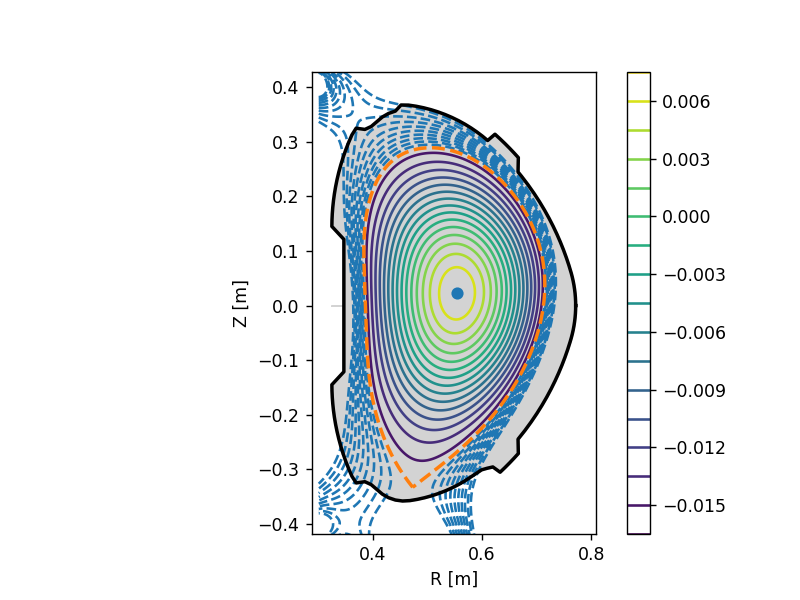

In [5]:
eq.plot_overview()

<IPython.core.display.Javascript object>


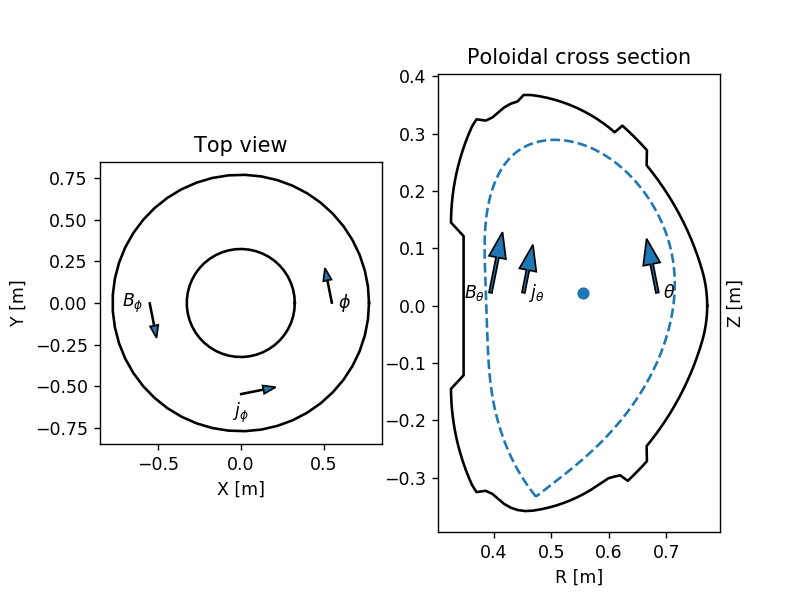

<IPython.core.display.Javascript object>


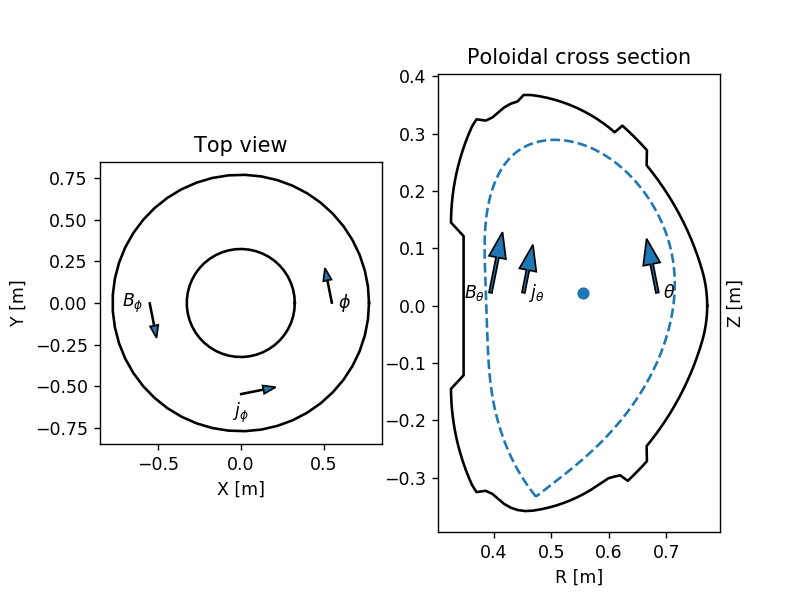

In [6]:
# You can see, there is wrong geometry in the database at the moment: 
eq.plot_geometry()

In [7]:
# Coordinates instance of first wall: 
fw = eq.first_wall

# Midplane separatrix-lcfs distance: 
r_mid = eq.r_mid(psi_n = 1, grid=False)
mapped_clearance = fw.r_mid - r_mid


<IPython.core.display.Javascript object>


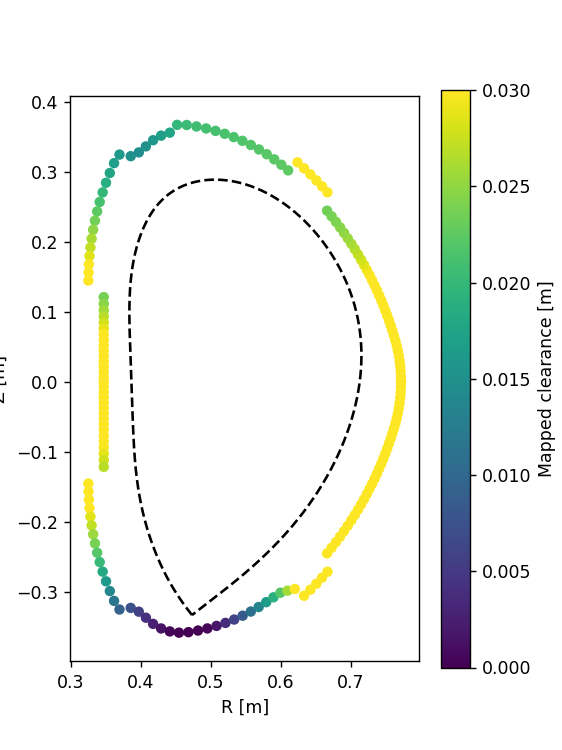

Text(0.5, 0, 'R [m]')

In [8]:
opts = {'vmin': 0, 'vmax': 0.03, 'edgecolors': 'none'}

#ax = axs[0]
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
cl = ax.scatter(fw.R, fw.Z, c=mapped_clearance, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Mapped clearance [m]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')



## Magnetic field on the FW: 

In [9]:
B_wall = eq.B_abs(fw)


<IPython.core.display.Javascript object>


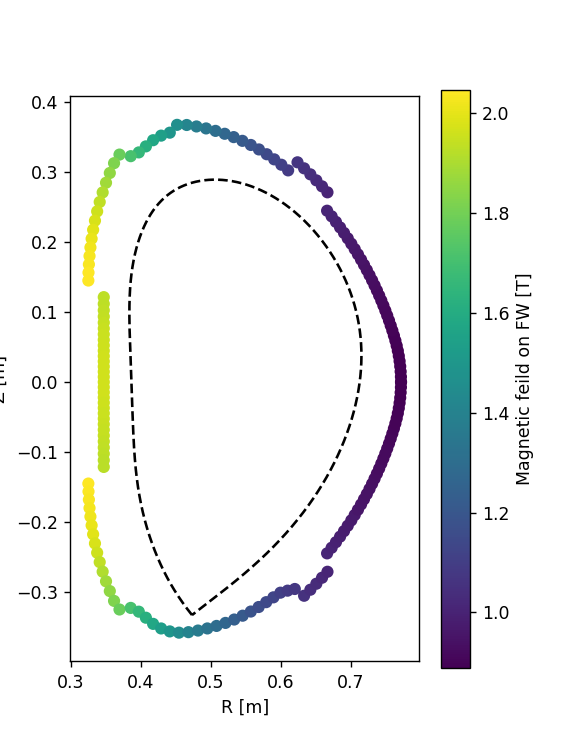

Text(0.5, 0, 'R [m]')

In [10]:
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
# opts = {'vmin': 6.0, 'vmax': 10.0, 'edgecolors': 'none'}
cl = ax.scatter(fw.R, fw.Z, c=B_wall)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic feild on FW [T]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

In [11]:
first_wall=eq.first_wall


#number of points to resample the limiter
npoints=1000



coords=Coordinates(eq,np.vstack((first_wall.R,first_wall.Z)).T)

# Resample using new method
coords2=coords.resample2(npoints)

#just for plotting
newpoints=np.vstack((coords2.R,coords2.Z))

# test area

# get normal vector
normal_vecs=coords2.normal_vector().T

# get normalised bvec
bvec=eq.Bvec_norm(coords2)

vec=np.linspace(0,0.2,2)

# get impact angle cosinus

impcos=coords2.impact_angle_cos()


<IPython.core.display.Javascript object>


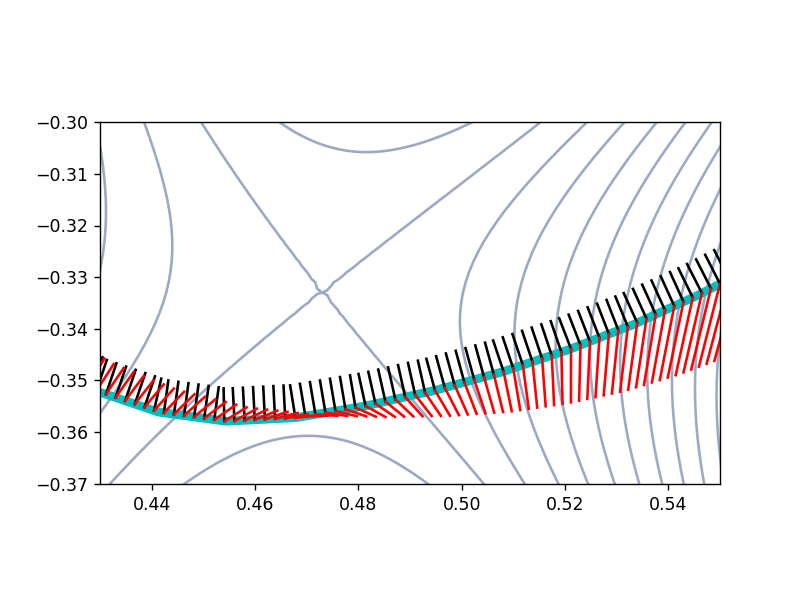

(2, 1000)


(-0.37, -0.3)

In [12]:
fign,axn=plt.subplots()

axn.plot(first_wall.R,first_wall.Z,lw=5,color='c')

axn.set_aspect('equal')
    
newpoints=np.vstack((coords2.R,coords2.Z))
print(np.shape(newpoints))

#plot normal vectors
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+normal_vecs[0,i]*vec,coords2.Z[i]+normal_vecs[1,i]*vec,color='k')
    
#plot b vectors
    
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+bvec[0,i]*vec,coords2.Z[i]+bvec[1,i]*vec,color='r')
    

grid = eq.grid(resolution=[1e-3, 2e-3], dim="step")

cl = axn.contour(grid.R, grid.Z, grid.psi_n, 400, alpha=0.5)

axn.set_xlim(0.43,0.55)
axn.set_ylim(-0.37,-0.3)

<IPython.core.display.Javascript object>


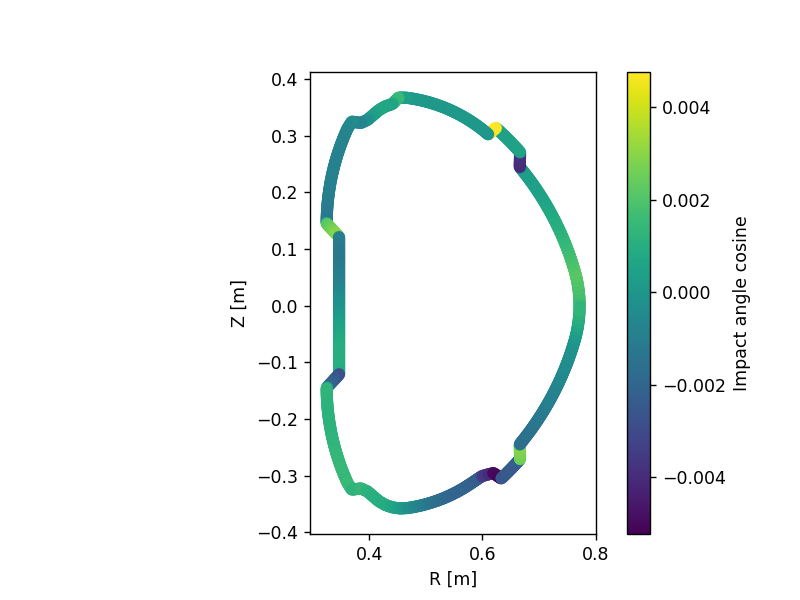

In [13]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=impcos)
im = plt.colorbar(mappable=cl, ax=ax, label='Impact angle cosine')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

In [14]:
ratio=eq.outter_parallel_fl_expansion_coef(coords2)

<IPython.core.display.Javascript object>


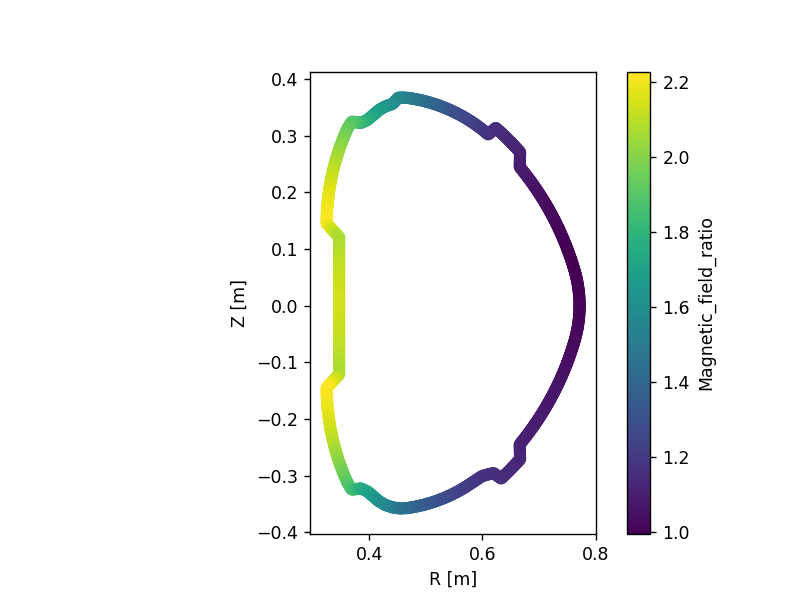

In [15]:
fig,ax=plt.subplots()

ax.set_aspect('equal')

#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R, coords2.Z, c=ratio)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic_field_ratio')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

In [16]:
flux_exp_coef=ratio[:-1]*np.abs(impcos)

<IPython.core.display.Javascript object>


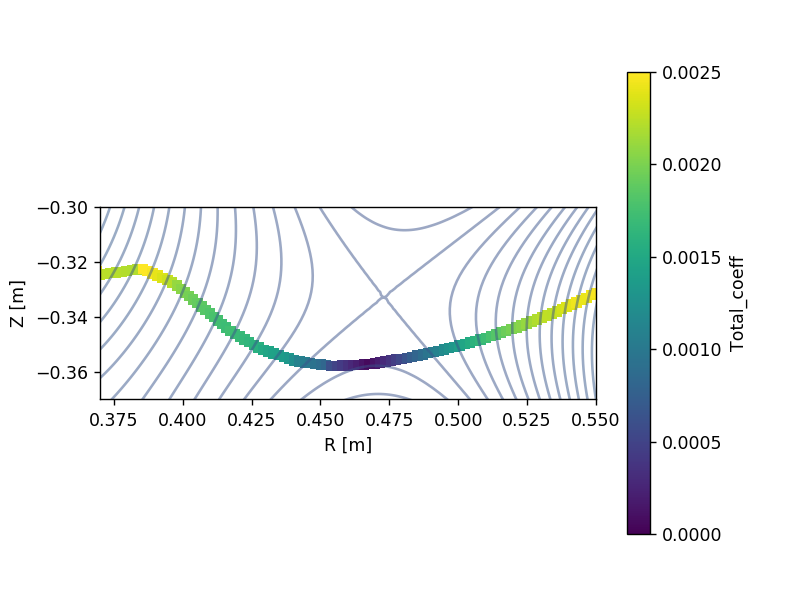

In [17]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 0.0025, 'edgecolors': 'none'} #

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=flux_exp_coef,marker='s',**opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Total_coeff')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.55)
ax.set_ylim(-0.37,-0.3)

ax.contour(grid.R, grid.Z, grid.psi_n, 600, alpha=0.5)

plt.show()